In [1]:
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load libraries

In [2]:
import pandas as pd
import numpy
from numpy.random import randint
import csv
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/NLP/train-complete.csv', sep=',')

In [4]:
data.head()

claim
0  "The money the Clinton Foundation took from fr...
1    Annual Mammograms May Have More False-Positives
2  SBRT Offers Prostate Cancer Patients High Canc...
3  Study: Vaccine for Breast, Ovarian Cancer Has ...
4  Some appendicitis cases may not require â€™eme...

In [5]:
data['claim'][2]

'SBRT Offers Prostate Cancer Patients High Cancer Control and Low Toxicity in Fewer Treatments'

Create dataframe for storing edge weights for Propagation graph 1

In [6]:
weights_df = pd.DataFrame(columns=['Topic','Dataset','Weights','E_Color'])
weights_df.to_csv('weights_df.csv');

Create dataframe for storing edge weights for Propagation graph 2

In [7]:
weights_df2 = pd.DataFrame(columns=['Topic','Dataset','Weights','E_Color'])
weights_df2.to_csv('weights_df2.csv');

Calculate edge weights for Propagation graph 1

In [8]:
def make_graphs(keywords, topic, color, weights_df, indx):
  engagement_df = pd.DataFrame(columns=['name', 'weights'])
  searched_keywords = '|'.join(keywords)

  # filter the data: keep only the rows that contain one of the keywords 
  
  df = data[data["claim"].str.contains(searched_keywords) | data["claim"].str.contains(searched_keywords)] 
  weight = df.shape[0]
  engagement_df.loc[indx] = ['Pubhealth'] + list(randint(10, size=1))
  engagement_df['weights'][indx]= weight
  # print(engagement_df)
  r = np.random.RandomState(seed=5)
  raw = engagement_df["weights"].tolist()
  # weights = [float(i)/sum(raw) for i in raw]
  weights = raw
  org = ['PUBHEALTH'];
 
  
  #save to csv
  weights_df=pd.read_csv("/content/weights_df.csv")
  
  for o, w in zip(org, weights):
    
    weights_df = weights_df.append({'Topic':topic, 'Dataset':o, 'Weights':w, 'E_Color':color}, ignore_index=True);

  weights_df.to_csv('weights_df.csv');

  

Calculate edge weights for Propagation graph 2

In [9]:
def make_graphs2(keywords, topic, keywords2, topic2, color, weights_df, indx):
  engagement_df = pd.DataFrame(columns=['name', 'weights'])
  searched_keywords = '|'.join(keywords)

  # filter the data: keep only the rows that contain one of the keywords 
  
  df1 = data[data["claim"].str.contains(searched_keywords) | data["claim"].str.contains(searched_keywords)] 

  searched_keywords2 = '|'.join(keywords2)

  # filter the data: keep only the rows that contain one of the keywords 
  
  df2 = data[data["claim"].str.contains(searched_keywords2) | data["claim"].str.contains(searched_keywords2)]

  df = pd.merge(df1, df2, on=['claim'], how='inner') 

  weight = df.shape[0]
  engagement_df.loc[indx] = ['Pubhealth'] + list(randint(10, size=1))
  engagement_df['weights'][indx]= weight
  # print(engagement_df)
  r = np.random.RandomState(seed=5)
  raw = engagement_df["weights"].tolist()
  # weights = [float(i)/sum(raw) for i in raw]
  weights = raw
  # org = ['PUBHEALTH'];
  
  # print(type(weights))
  # print(type(org));
  
  #save to csv
  weights_df=pd.read_csv("/content/weights_df2.csv")
  
  for w in (weights):
    
    weights_df = weights_df.append({'Topic':topic, 'Dataset':topic2, 'Weights':w, 'E_Color':color}, ignore_index=True);

  weights_df.to_csv('weights_df2.csv');

  # df = pd.DataFrame({'from':['AstraZeneca','GSK','JNJ','Biogen','Pfizer'],'to':['Topic','Topic','Topic','Topic','Topic'],'weight':weights})
  
  # G = nx.Graph()
  # return G

In [10]:
keywords_list = [['cancer', 'study', 'drug', 'test', 'risk', 'breast', 'say', 'show', 'health'],
                ['health', 'coronavirus', 'drug', 'trump', 'state', 'death'],
                ['test', 'case', 'woman', 'report', 'plan', 'study'], 
                ['heart', 'breast', 'show', 'find', 'prostate', 'health', 'attack'],
                ['trump', 'president', 'donald', 'mental', 'promise'],
                ['year', 'blood', 'find', 'approve', 'promise'],
                ['health', 'drug', 'test', 'study', 'year', 'show', 'cancer'],
                ['coronavirus', 'trump', 'people', 'vaccine', 'donald', 'risk'],
                ['heart', 'health', 'attack', 'cancer'], 
                ['help', 'risk', 'treatment', 'show', 'disease', 'patient']
                ]

keywords_list2 = [['cancer', 'study', 'drug', 'test', 'risk', 'breast', 'say', 'show', 'health'],
                ['health', 'coronavirus', 'drug', 'trump', 'state', 'death'],
                ['test', 'case', 'woman', 'report', 'plan', 'study'], 
                ['heart', 'breast', 'show', 'find', 'prostate', 'health', 'attack'],
                ['trump', 'president', 'donald', 'mental', 'promise'],
                ['year', 'blood', 'find', 'approve', 'promise'],
                ['health', 'drug', 'test', 'study', 'year', 'show', 'cancer'],
                ['coronavirus', 'trump', 'people', 'vaccine', 'donald', 'risk'],
                ['heart', 'health', 'attack', 'cancer'], 
                ['help', 'risk', 'treatment', 'show', 'disease', 'patient']
                ]

In [11]:
topic_list = ['Cancer', 'Coronavirus', 'Women\'s health', 'Emergency health conditions', 'US Presidency',
              'Blood donation', 'Drug tests', 'US & Coronavirus', 'Cardiac disease', 'Disease treatment']

topic_list2 = ['Cancer', 'Coronavirus', 'Women\'s health', 'Emergency health conditions', 'US Presidency',
'Blood donation', 'Drug tests', 'US & Coronavirus', 'Cardiac disease', 'Disease treatment']

In [12]:
colors = ['violet', 'indigo', 'blue', 'green', 'brown', 'orange', 'red', 'cyan', 'pink', 'darkgreen']

Call function to calculate edge weights for graph 1

In [13]:
indx=-1
for keywords, topic, color in zip(keywords_list, topic_list, colors):


  
  make_graphs(keywords, topic, color, weights_df, indx+1)

Call function to calculate edge weights for graph 2

In [14]:
indx=-1
for keywords, topic, color in zip(keywords_list, topic_list, colors):
  if not topic_list2:
    break
  if not keywords_list2:
    break
  del topic_list2[0]
  del keywords_list2[0]
  for keywords2, topic2 in zip(keywords_list2, topic_list2):
    
    print(topic, topic2, color)
  
  
    make_graphs2(keywords, topic, keywords2, topic2, color, weights_df2, indx+1)

Cancer Coronavirus violet
Cancer Women's health violet
Cancer Emergency health conditions violet
Cancer US Presidency violet
Cancer Blood donation violet
Cancer Drug tests violet
Cancer US & Coronavirus violet
Cancer Cardiac disease violet
Cancer Disease treatment violet
Coronavirus Women's health indigo
Coronavirus Emergency health conditions indigo
Coronavirus US Presidency indigo
Coronavirus Blood donation indigo
Coronavirus Drug tests indigo
Coronavirus US & Coronavirus indigo
Coronavirus Cardiac disease indigo
Coronavirus Disease treatment indigo
Women's health Emergency health conditions blue
Women's health US Presidency blue
Women's health Blood donation blue
Women's health Drug tests blue
Women's health US & Coronavirus blue
Women's health Cardiac disease blue
Women's health Disease treatment blue
Emergency health conditions US Presidency green
Emergency health conditions Blood donation green
Emergency health conditions Drug tests green
Emergency health conditions US & Coronavi

Create Propagation graph 1

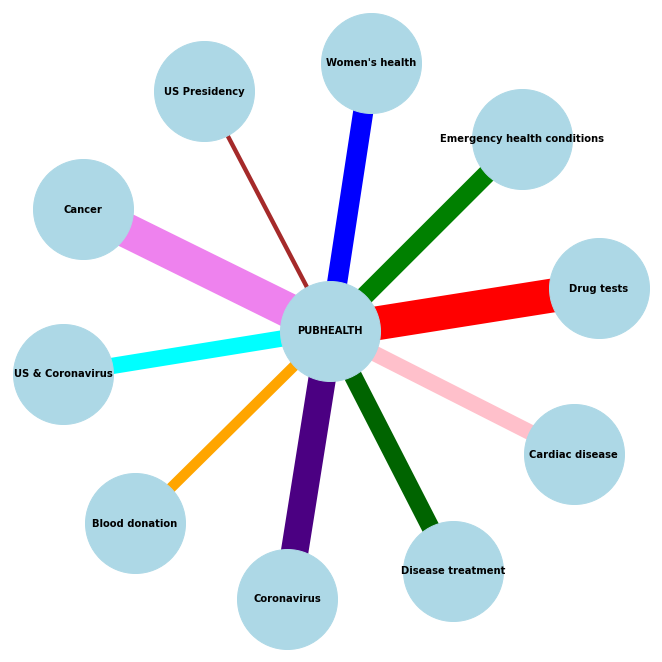

In [15]:
df = pd.read_csv("/content/weights_df.csv")
df = df.loc[:, 'Topic':]
weight_sum = sum(df["Weights"].tolist())
G = nx.Graph()
for n1, n2, e, c in zip(df['Topic'], df['Dataset'], df['Weights'], df['E_Color']):
  G.add_edge(u_of_edge=n1, v_of_edge=n2, weight=(float(e)/weight_sum), edge_color = c)
edges = G.edges()

weights = [G[u][v]['weight']*200 for u,v in edges]
edge_colors=[G[u][v]['edge_color'] for u,v in edges]
plt.figure(3,figsize=(9,9)) 
nx.draw(G, pos = nx.nx_pydot.graphviz_layout(G), with_labels=True, width = weights, node_color = 'lightblue',font_size=10, font_weight='bold', edge_color=edge_colors, node_size=10000)
plt.show()

Create Propagation graph 2

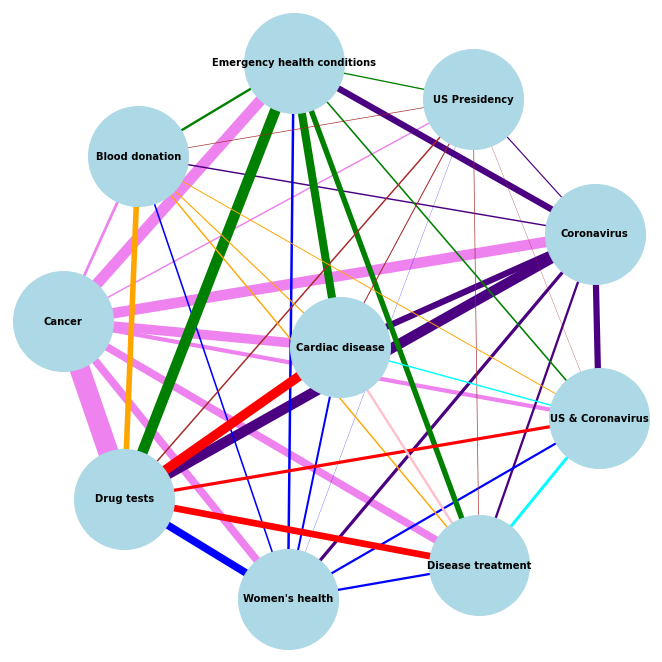

In [16]:
df = pd.read_csv("/content/weights_df2.csv")
df = df.loc[:, 'Topic':]
weight_sum = sum(df["Weights"].tolist())
G = nx.Graph()
for n1, n2, e, c in zip(df['Topic'], df['Dataset'], df['Weights'], df['E_Color']):
  G.add_edge(u_of_edge=n1, v_of_edge=n2, weight=(float(e)/weight_sum), edge_color = c)
edges = G.edges()

weights = [G[u][v]['weight']*200 for u,v in edges]
edge_colors=[G[u][v]['edge_color'] for u,v in edges]
plt.figure(3,figsize=(9,9)) 
nx.draw(G, pos = nx.nx_pydot.graphviz_layout(G), with_labels=True, width = weights, node_color = 'lightblue',font_size=10, font_weight='bold', edge_color=edge_colors, node_size=10000)
plt.show()